In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\Social_Network_Ads.csv")
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
179,15673367,Female,31,34000,0
259,15815236,Female,45,131000,1
365,15807525,Female,59,29000,1
26,15792818,Male,49,28000,1
285,15734161,Female,37,93000,1


In [4]:
df=df.iloc[:,2:]

In [5]:
df.sample(5)

,Age,EstimatedSalary,Purchased
372,39,73000,0
385,56,60000,1
297,43,112000,1
222,37,144000,1
92,26,15000,0


Train test split

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)

Standard Scaler

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

#transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [12]:
# Now the X_trained_scaled is a numpy array so we will convert it into a dataframe
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [13]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [14]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [15]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


Effect of scaling

<function matplotlib.pyplot.show(close=None, block=None)>

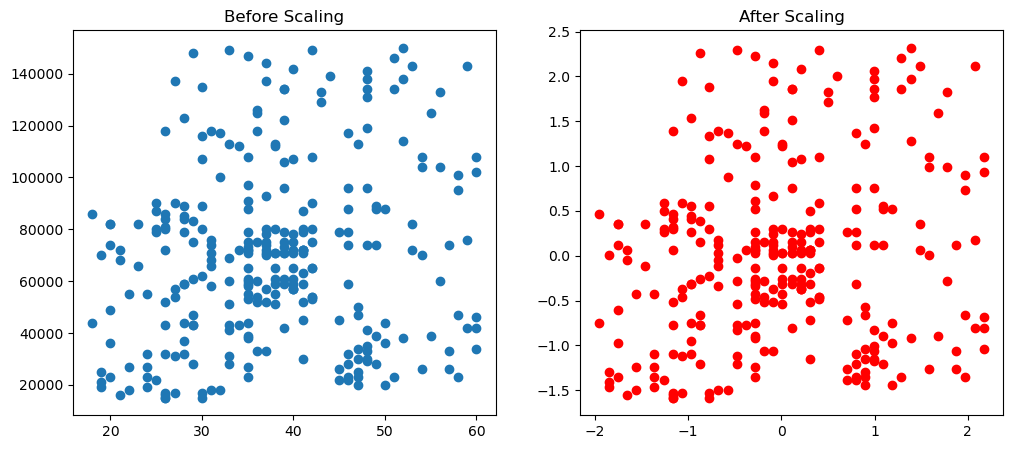

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(x=X_train['Age'],y=X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(x=X_train_scaled['Age'],y=X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

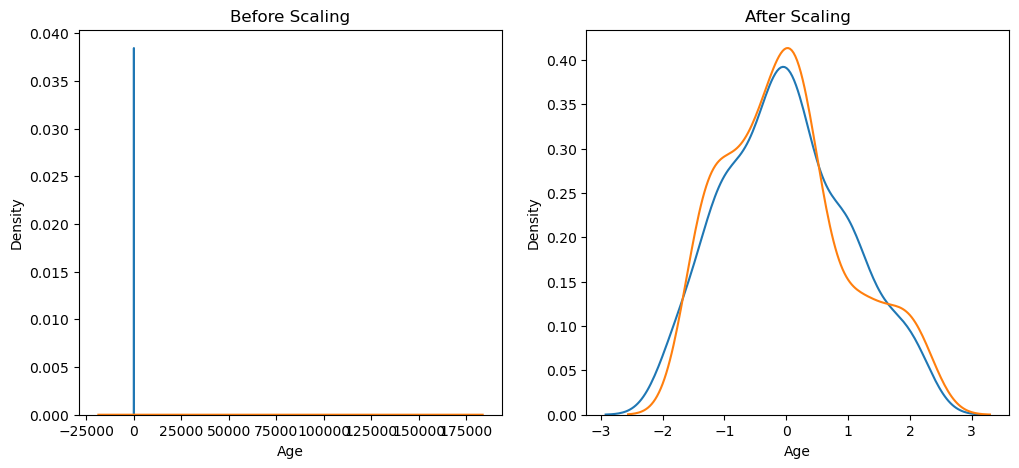

In [32]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(12,5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show

Comparison of distributions

<function matplotlib.pyplot.show(close=None, block=None)>

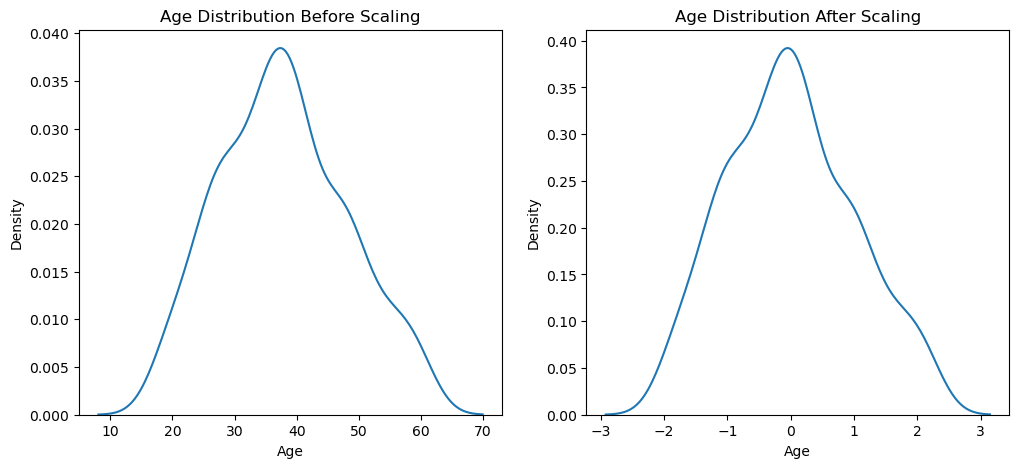

In [35]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

# Before Scaling 
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'],ax=ax1)

# After Scaling
ax2.set_title('Age Distribution After Scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

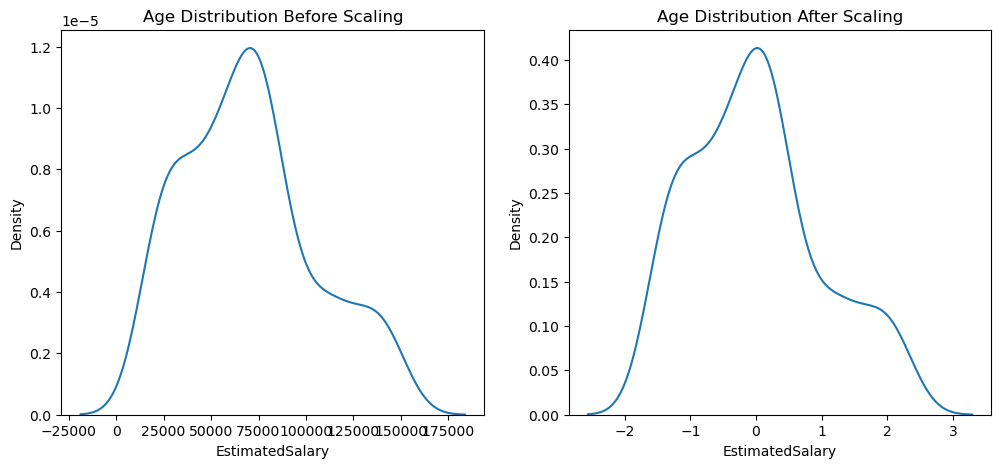

In [36]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

# Before Scaling 
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

# After Scaling
ax2.set_title('Age Distribution After Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show

IMPORTANCE OF SCALING

In [37]:
from sklearn.linear_model import LogisticRegression

In [39]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()
lr.fit(X_train,Y_train)
lr_scaled.fit(X_train_scaled,Y_train)

LogisticRegression()

In [40]:
y_pred = lr.predict(X_test)
y_pred_scaled= lr_scaled.predict(X_test_scaled)

In [42]:
from sklearn.metrics import accuracy_score

In [44]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667
